# Integer linear programming experiments for vertex cover problems
// TODO Simple description of the project to add.

First of all, import the Python libraries used in the process of data analysis.

In [45]:
import pandas as pd
import numpy as np
import pyvis
import matplotlib.pyplot as plt
from matplotlib import cm
import params as pr
from mpl_toolkits import mplot3d

Import experimental data from the corresponding csv files. The data are splitted over multiple csv file, one for each graph class studied. The first three rows of one of these files are displayed below, to give an idea of the file structure.

In [2]:
gnp_data = pd.read_csv('data/gnp.csv')
bag_data = pd.read_csv('data/bag.csv')
rrg_data = pd.read_csv('data/rrg.csv')
wsg_data = pd.read_csv('data/wsg.csv')
gnp_data.head(3)

,name,n,p,seed,time,ticks,sol_nodes,gap,time_lim,edges,cnnct_cmp,avg_clust,std_dev_clust,radius,diameter
0,gnp_000,100,0.1,1,0.39,99.51,69.0,0.0,False,508,1,0.113342,0.053480,3,4
1,gnp_001,100,0.1,2,0.45,100.66,68.0,0.0,False,484,1,0.097705,0.047745,3,4
2,gnp_002,100,0.1,3,0.52,138.64,69.0,0.0,False,487,1,0.083568,0.043205,3,4


## Erdős–Rényi graphs
This chapter reports a detailed analysis of a particular subset of graphs named Erdős–Rényi graphs (also known as binomial graphs) generated using the `gnp_random_graph()` method of the Networkx package. With this method, the inclusion of each edge of the graph depends on a parametric probability *p*, indipendent from every other edge of the graph. 

First of all, plot the correlation between the solution time (y axis) versus the average clustering index of the graph (x axis). Graphs with different sizes are labeled with different colors. 

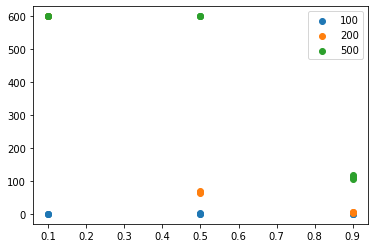

In [42]:
for i in range(len(pr.GNP_N)):
    filter = gnp_data['n']==pr.GNP_N[i]
    data = gnp_data[filter]
    plt.scatter(data['p'], data['time'], label=str(pr.GNP_N[i]))
plt.legend(loc="upper right")
plt.show()

Try to find a correlation plotting together the size of the problem, the average clustering coefficient of the graph (x and y axis) and the solution time.

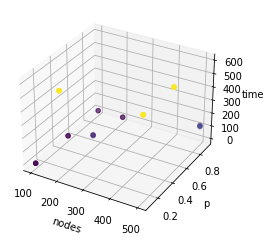

In [49]:
ax = plt.axes(projection='3d')
z = gnp_data['time']
x = gnp_data['n']
y = gnp_data['p']
ax.set_xlabel('nodes')
ax.set_ylabel('p')
ax.set_zlabel('time')
ax.scatter(xdata, ydata, zdata, c=z);

## Watts–Strogatz small-world graph
Watts-Strogatz graphs are generated using the Watts–Strogatz model (proposed by Duncan J. Watts and Steven Strogatz). This is a random graph generation model that produces graph with small-world properties (e.g. high clustering and short average path length). In this experiments, graph are generated using the `watts_strogatz_graph` method of the Networkx package. 

The graph generation is composed of three main stages. Firstly, the *n* nodes of the graph are wired together in a ring form. Then, each node is connected to its *k* nearest neighbors (*k-1* if *k* is not even), *k/2* on each side. Finally, rewire each node's *k/2* rightmost edges (with a probability *p*) with a random node of the graph (checks to avoid self-loops and duplicates in this stage).

First of all, check the correlation between the solution time (y axis) and the average clustering index, as already performed for the graphs generated using the Erdős–Rényi model.

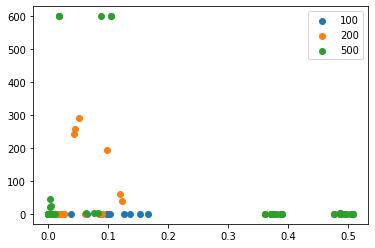

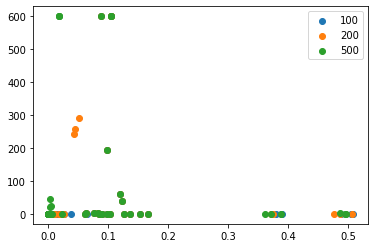

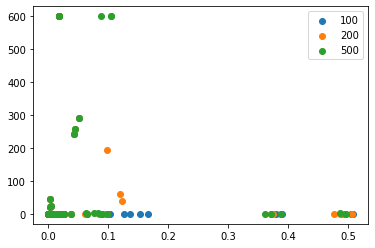

In [5]:
def correlation_wsg(p):
    for i in range(len(pr.WS_N)):
        filter = np.logical_or(wsg_data['n'] == pr.WS_N[i],wsg_data['p']==p)
        data = wsg_data[filter]
        plt.scatter(data['avg_clust'], data['time'], label=str(pr.WS_N[i]))
    plt.legend(loc="upper right")
    plt.show()

correlation_wsg(0.1)
correlation_wsg(0.5)
correlation_wsg(0.9)

Instead, analyzing the raw data it is possible to observe a correlation between the number of neighbors joined with each other *k*, the likelihood of an edge k to be rewired *p* and the time neeeded to find the minimum vertex cover of the graph. 

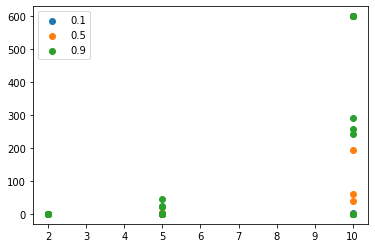

In [102]:
for i in range(len(pr.WS_P)):
    filter = wsg_data['p'] == pr.WS_P[i]
    data = wsg_data[filter]
    plt.scatter(data['k'], data['time'], label=str(pr.WS_P[i]))
plt.legend(loc="upper left")
plt.show()

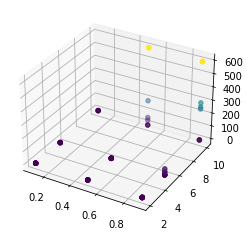

In [105]:
ax = plt.axes(projection='3d')
p = np.ravel(wsg_data['p'])
k = np.ravel(wsg_data['k'])
t = np.ravel(wsg_data['time'])
ax.scatter(p, k, t, c=t)
plt.show()

## Regular graphs
Regular graphs are a particular class of graph where each vertex has the same number of neighbors. In graph theory, a regular graph where every vertex has degree *k* is also known as *k*-regular graph.